In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import missingno as msno

## from sklearn.model_selection import train_test_split
## from sklearn.ensemble import RandomForestClassifier
## from sklearn.metrics import classification_report, confusion_matrix

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

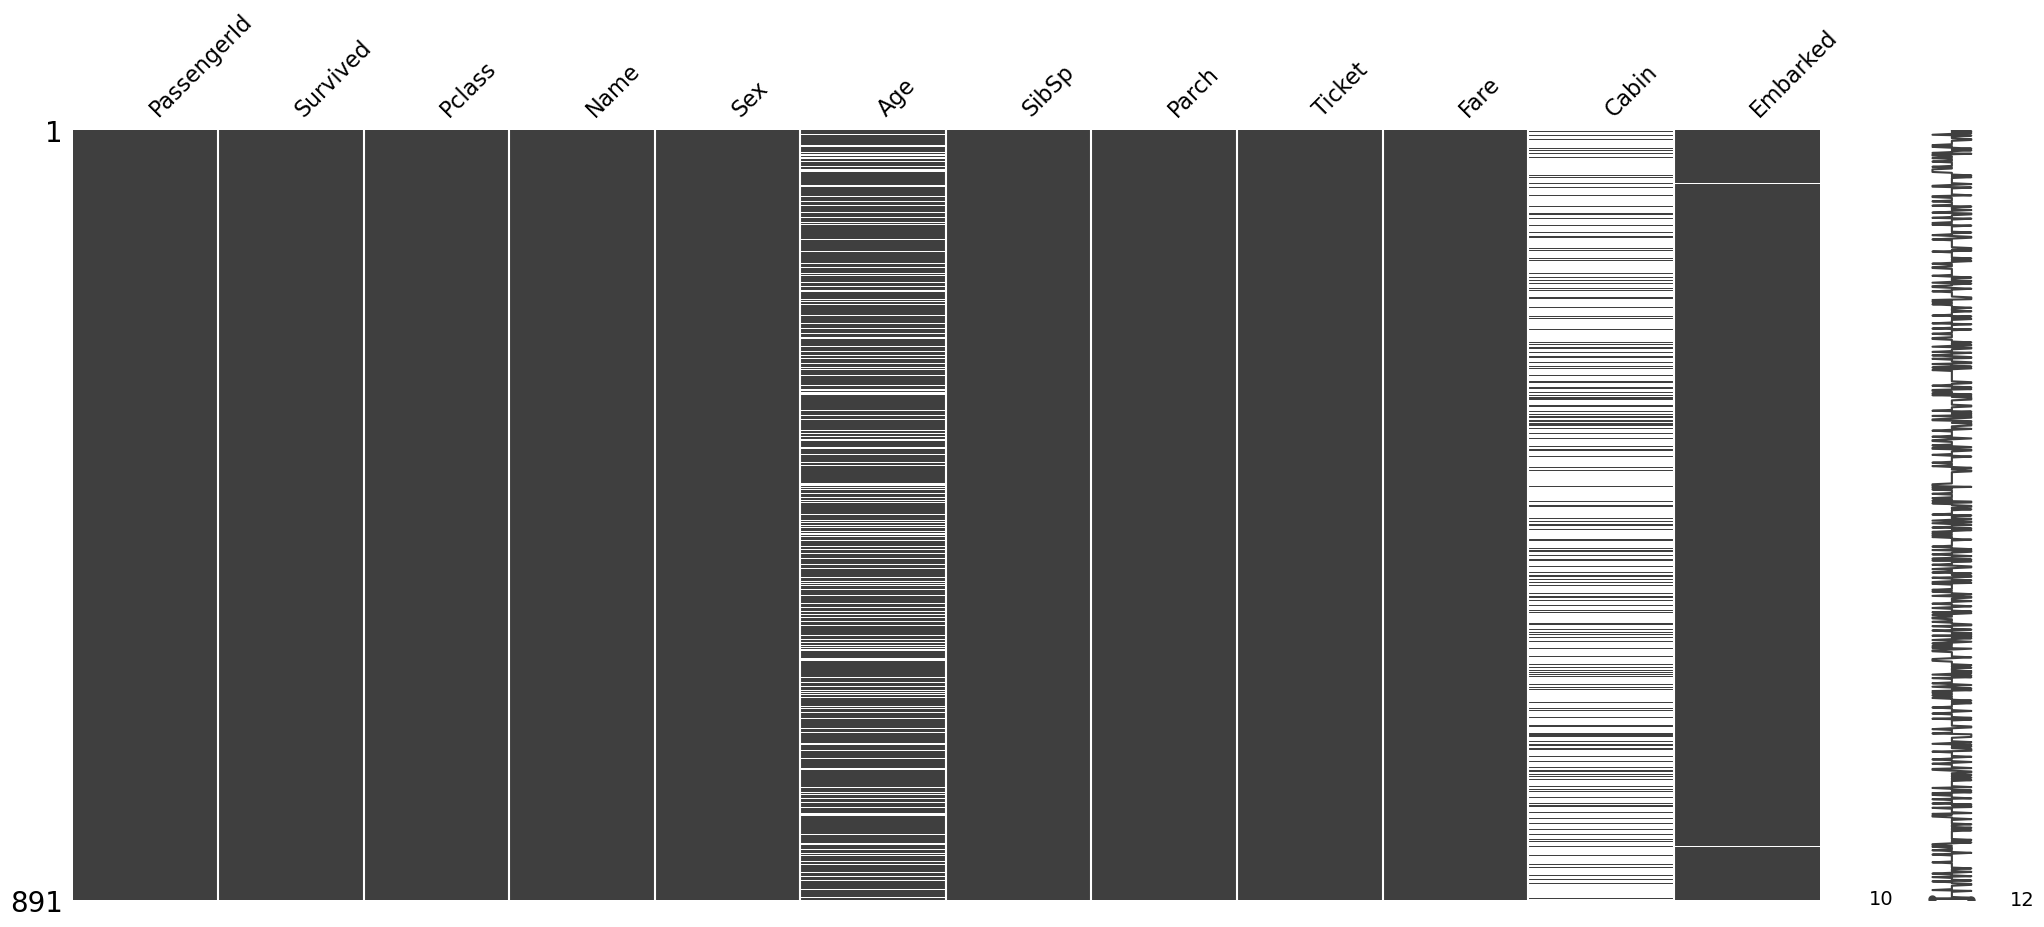

In [2]:
# 1. 데이터 로드
df = pd.read_csv('train.csv')
display(df.head())
df.info()
display(df.describe())
msno.matrix(df)


In [ ]:
# ---------------------------------------------------------
# (2) PassengerId 제거 & Target 분리
# PassengerId는 물리적 의미가 없는 단순 인덱스이므로 노이즈 방지를 위해 제거합니다.
# ---------------------------------------------------------
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']
## print(X)
## print(y)

     Pclass                                               Name     Sex   Age  \
0         3                            Braund, Mr. Owen Harris    male  22.0   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2         3                             Heikkinen, Miss. Laina  female  26.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4         3                           Allen, Mr. William Henry    male  35.0   
..      ...                                                ...     ...   ...   
886       2                              Montvila, Rev. Juozas    male  27.0   
887       1                       Graham, Miss. Margaret Edith  female  19.0   
888       3           Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
889       1                              Behr, Mr. Karl Howell    male  26.0   
890       3                                Dooley, Mr. Patrick    male  32.0   

     SibSp  Parch            Ticket    

In [7]:
# ---------------------------------------------------------
# (1) Data Leakage 방지: 전처리 이전에 Train/Valid 분리
# ---------------------------------------------------------
# 미래의 데이터(Valid)가 현재의 평균값 계산 등에 개입하지 않도록 먼저 쪼갭니다.
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train)

     Pclass                                Name     Sex   Age  SibSp  Parch  \
331       1                 Partner, Mr. Austen    male  45.5      0      0   
733       2          Berriman, Mr. William John    male  23.0      0      0   
382       3                  Tikkanen, Mr. Juho    male  32.0      0      0   
704       3             Hansen, Mr. Henrik Juul    male  26.0      1      0   
813       3  Andersson, Miss. Ebba Iris Alfrida  female   6.0      4      2   
..      ...                                 ...     ...   ...    ...    ...   
106       3    Salkjelsvik, Miss. Anna Kristine  female  21.0      0      0   
270       1               Cairns, Mr. Alexander    male   NaN      0      0   
860       3             Hansen, Mr. Claus Peter    male  41.0      2      0   
435       1           Carter, Miss. Lucile Polk  female  14.0      1      2   
102       1           White, Mr. Richard Frasar    male  21.0      0      1   

                Ticket      Fare    Cabin Embarked 

In [ ]:
# 1. 'Age'의 결측치는 중앙값(median)으로 채운다.
# 2. 'Embarked'의 결측치는 최빈값(mode)으로 채운다. (2개밖에 없으므로)
# 3. 'Cabin'은 결측치가 너무 많으므로 컬럼 자체를 삭제(drop)한다.

df.fillna({'Age': df['Age'].median()}, inplace=True)
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# 1. 'Sex' 컬럼을 숫자로 매핑한다 (male: 0, female: 1)
# 2. 'Embarked' 컬럼을 숫자로 매핑한다 (S: 0, C: 1, Q: 2)
# 3. 이름(Name), 티켓(Ticket) 컬럼은 삭제한다.

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
# 1. 학습에 사용할 Feature(X)와 Target(y, Survived)을 분리한다.
X = df.drop('Survived', axis=1)
y = df['Survived']
## print(X.shape, y.shape)


In [ ]:

# 2. 전체 데이터를 학습용(train)과 검증용(valid)으로 8:2 분리한다. (random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# 또는 아래와 같이 쓸 수도 있다.
# X_train, X_valid, y_train, y_valid = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape) 


In [ ]:

# 3. RandomForestClassifier 모델을 생성하고 학습시킨다.

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


In [ ]:

# 4. 검증 세트에 대한 정확도(Accuracy)를 출력한다.

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_valid)
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))
accuracy = np.mean(y_valid == y_pred)
print(f"Accuracy: {accuracy:.4f}")


In [ ]:

# 5. feature 중요도를 시각화한다.
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



